In [9]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def char_func_grid(state, xvec):
    """Calculate the Characteristic function as a 2Dgrid (xvec, xvec) for a given state.

    Args:
        state (Qobject): State of which we want to calc the charfunc
        xvec (_type_): array of displacements. The char func will be calculated for the grid (xvec, xvec)

    Returns:
        tuple(ndarray, ndarray): Re(char func), Im(char func)
    """
    cfReal = np.empty((len(xvec),len(xvec)))
    cfImag = np.empty((len(xvec),len(xvec)))
    N = state.dims[0][1]

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            expect_value = qt.expect(qt.displace(N, alpha_x +1j*alpha_p),qt.ptrace(state,1))
            cfReal[j,i] =  np.real(expect_value)
            cfImag[j,i] =  np.imag(expect_value)

    return cfReal,cfImag   
 
    
def plot_char(
    state,
    max_alpha=3,
    npts=50,
    real = True,
    fig=None,
    ax=None,
    vmin = -1,
    vmax = 1,
    cbar = False,
    
):
    
    xvec = np.linspace(-max_alpha, max_alpha, npts)
    CF_real, CF_imag = char_func_grid(state, xvec)
    
    if fig is None:
        fig = plt.figure(figsize=(6, 5))
    if ax is None:
        ax = fig.subplots()
    
    if real:
        im = ax.pcolormesh(xvec, xvec, (CF_real), cmap = 'bwr', vmin=vmin, vmax=vmax, shading='auto')
        ax.set_aspect('equal')
        # ax.set_xlabel(r"Re$(\alpha)$")
        # ax.set_ylabel(r"Im$(\alpha)$")
        # ax.set_title(r'$ Re(C(\alpha))$')
    else:
        
        im = ax.pcolormesh(xvec, xvec, (-CF_imag), cmap = 'bwr', vmin=vmin, vmax=vmax,shading='auto')
        ax.set_aspect('equal')
        ax.set_xlabel(r"Re$(\alpha)$")
        ax.set_ylabel(r"Im$(\alpha)$")
        ax.set_title(r'$ Im(C(\alpha))$')
    
    if cbar:
        fig.subplots_adjust(right=0.8, hspace=0.25, wspace=0.25)
        # todo: ensure colorbar even with plot...
        # todo: fix this colorbar

        cbar_ax = fig.add_axes([0.85, 0.225, 0.025, 0.65])
        ticks = np.linspace(-1, 1, 5)
        fig.colorbar(im, cax=cbar_ax, ticks=ticks)
        



def char_func_grid_exp(state: qt.Qobj, xvec, t_displace: list, t_wait: list, epsilon, chi, loss,  real = True):
    ## t_displace, t_wait and epsilon have to be define outside such that we get an ECD(1) with alpha = 1
    cf = np.empty((len(xvec),len(xvec)))

    for i, alpha_x in enumerate(xvec):
        for j, alpha_p in enumerate(xvec):
            cf[i,j] = -char_point(state, t_displace, t_wait, -(alpha_x +1j*alpha_p), epsilon, chi, loss, real = real) # added a minus sign to be consisten with experiment


    return cf 

In [15]:
from qutip import*
N = 100
alpha = 2.5

cat = (coherent(N,alpha) - coherent(N,-alpha)).unit()

In [16]:
# System
N = 75
Ic = qeye(N)
a = destroy(N)
n = a.dag()*a

t1 = 100
gamma_a_loss = 1 / t1  # t1 = 100mu s
a_loss = np.sqrt(gamma_a_loss) * destroy(N)

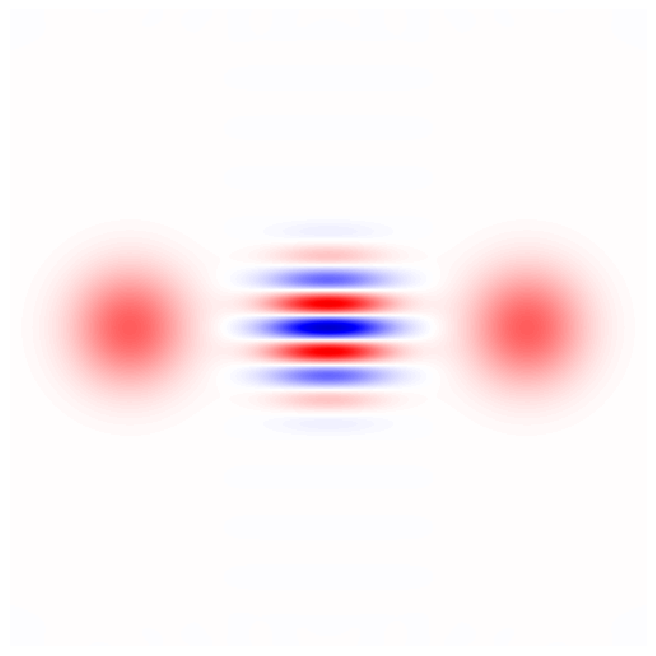

<Figure size 600x500 with 0 Axes>

In [31]:
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_wigner(cat, max_alpha=4, npts = 500, ax=ax)
fig.savefig('cat_wigner.png', dpi=300, bbox_inches='tight')

In [32]:
t_list = np.linspace(0, 200, 10)
states = mesolve(Ic, cat, t_list, [a_loss], ).states

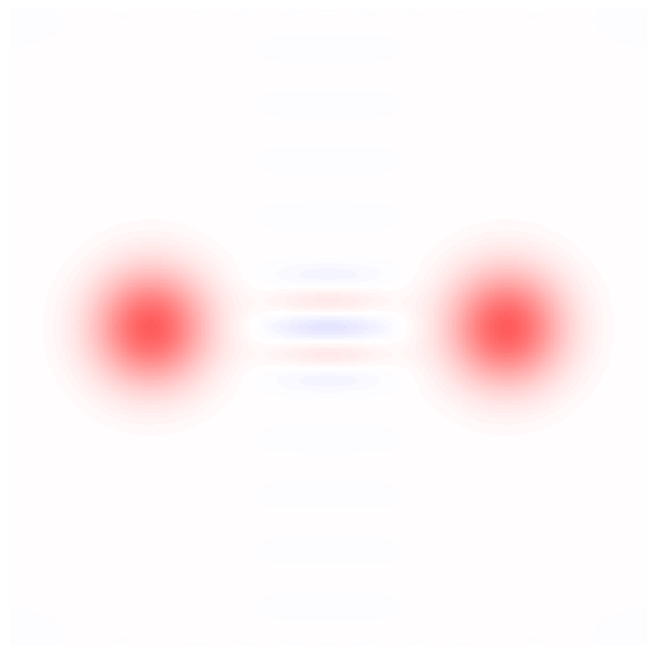

<Figure size 600x500 with 0 Axes>

In [33]:
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_wigner(states[1], max_alpha=4, npts = 500, ax=ax)
fig.savefig('cat_wigner_loss.png', dpi=300, bbox_inches='tight')

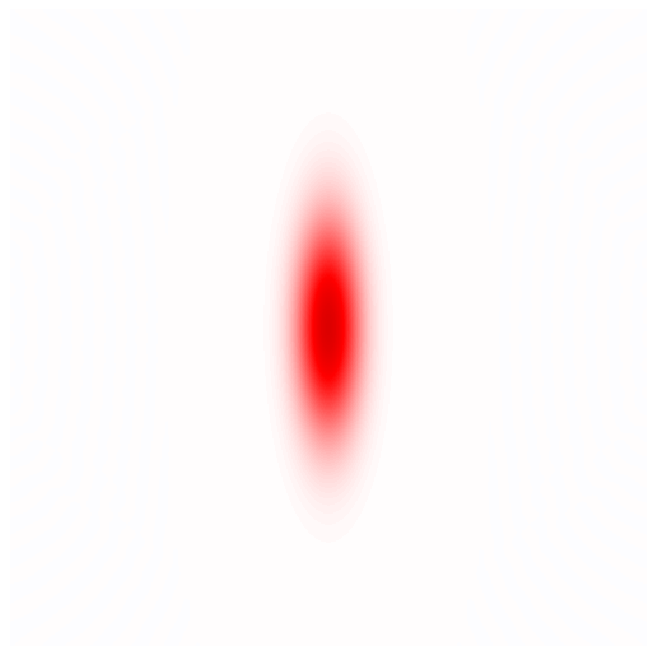

<Figure size 600x500 with 0 Axes>

In [6]:
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

squ = squeeze(N,0.6)*fock(N,0)
plot_wigner(squ, max_alpha=4, npts = 500, ax=ax)
fig.savefig('squ.png', dpi=300, bbox_inches='tight')

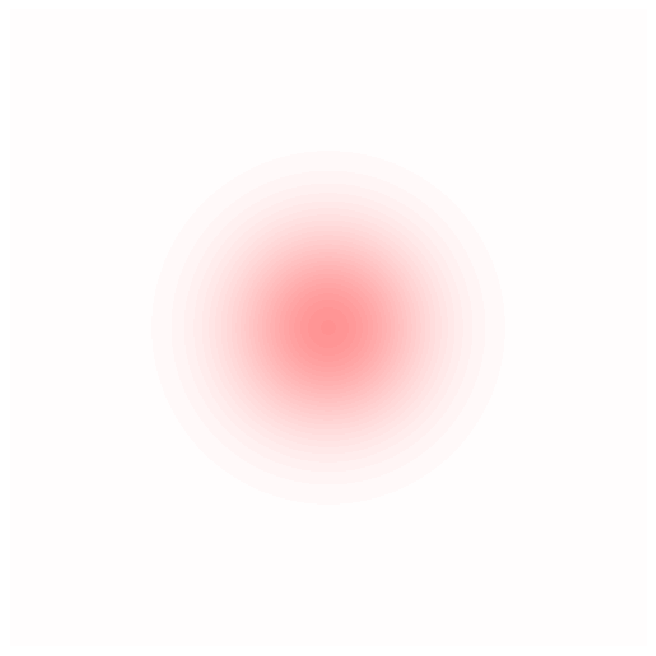

<Figure size 600x500 with 0 Axes>

In [4]:
fig, ax = plt.subplots()
thermal_state = thermal_dm(N, 1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_wigner(thermal_state, max_alpha=4, npts = 500, ax=ax)
fig.savefig('thermal.png', dpi=300, bbox_inches='tight')

KeyboardInterrupt: 

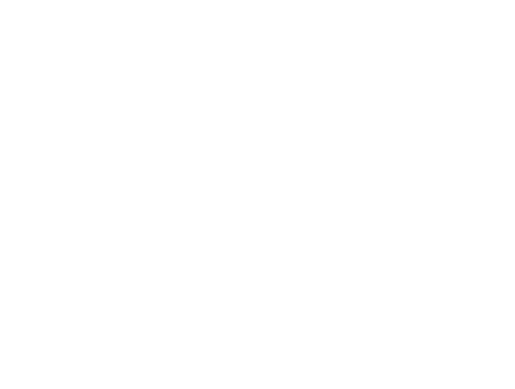

In [17]:
fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis("off")

plot_char(tensor(fock(2,0),cat), max_alpha=8, npts = 500, ax=ax)
fig.savefig('cat_char.pdf', dpi=300, bbox_inches='tight')

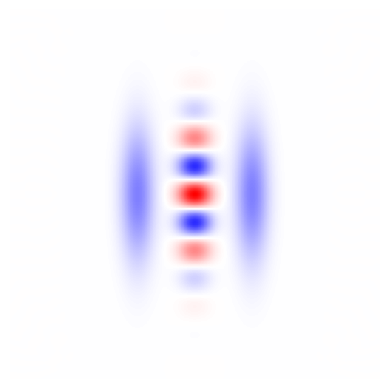

<Figure size 600x500 with 0 Axes>

In [18]:
sq_cat = (squeeze(N,0.7)*(coherent(N,alpha) - coherent(N,-alpha))).unit()
fig, ax = plt.subplots()

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

plot_char(tensor(fock(2,0),sq_cat), max_alpha=8, npts = 500, ax=ax)
fig.savefig('sqcat_char.pdf', dpi=300, bbox_inches='tight')